# sklearn机器学习要点总结

## 1、总体流程

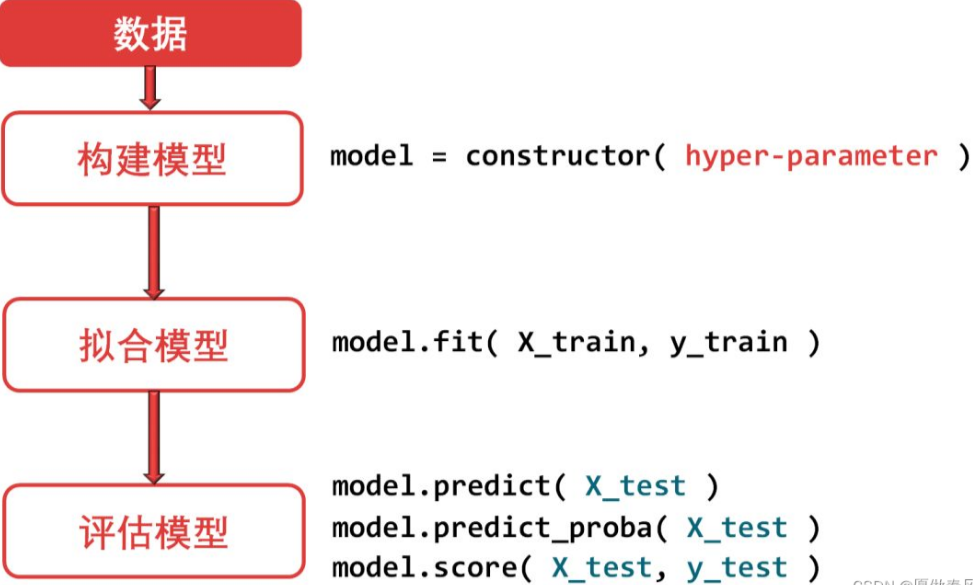

**<font color=red>总体处理流程可以分为：加载数据集、数据预处理、数据集划分、模型估计器创建、模型拟合、模型性能评估</font>**

**<font color='red'补充说明：流程总体上分为如下步骤:加载数据集、数据预处理、数据集分裂(产生训练集和测试集)、构建模型对象、拟合模型和评估模型</font>**

## 引入数据集

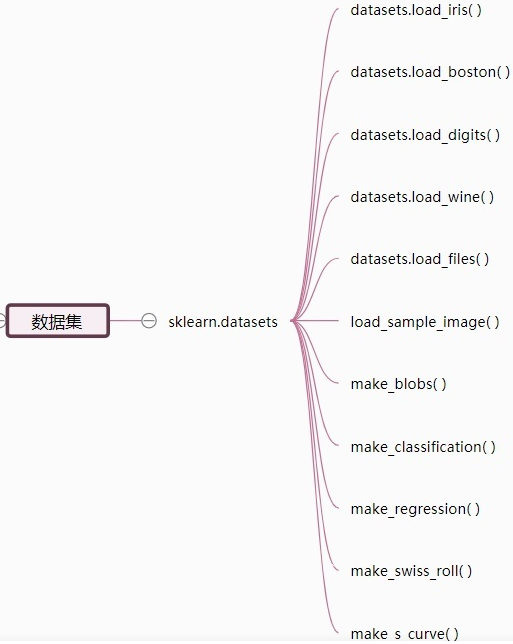

In [1]:
#导入波士顿房价数据集
from sklearn.datasets import load_boston

In [2]:
#使用数据集时,以鸢尾花数据集为例
from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

## 将数据集转换为DataFram:

In [2]:
import pandas as pd
iris_data=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_data['target']=iris.target_names[iris.target]
iris_data.head(3).append(iris_data.tail(3))

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        target  
0       setosa  
1       setosa  
2       setosa  
147  virginica  
148  virginica  
149  virginica

## 可视化数据

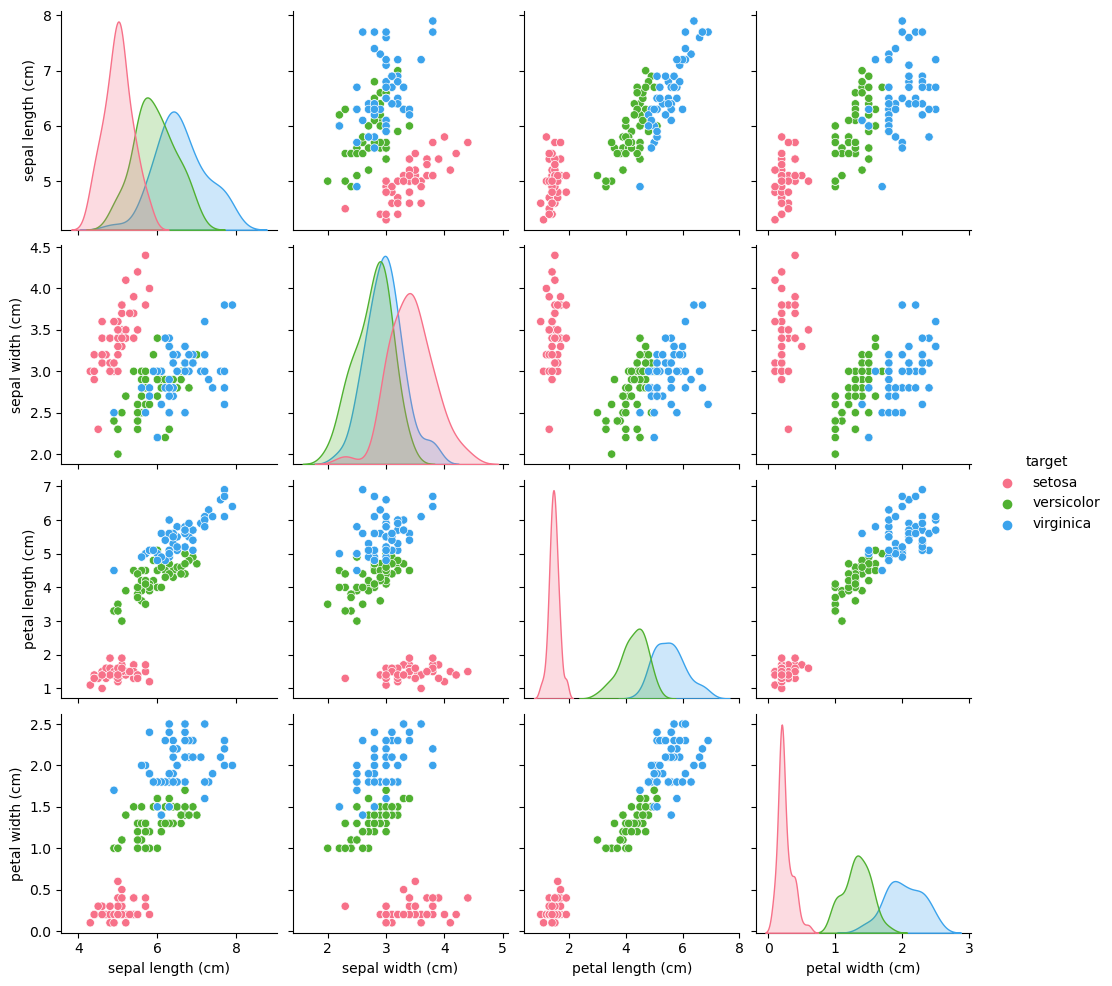

In [4]:
import seaborn as sns
sns.pairplot(iris_data,hue='target',palette='husl')

## 数据预处理

参考文献：https://developer.aliyun.com/article/1064189

### 数据预处理之数据标准化：

In [4]:
#参考：https://blog.csdn.net/weixin_45589116/article/details/123921246?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_baidulandingword~default-0-123921246-blog-124317243.235^v27^pc_relevant_3mothn_strategy_recovery&spm=1001.2101.3001.4242.1&utm_relevant_index=2

from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(iris.data)    #关于fit()、fit_transform()和transform()的区别参考上面资料
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 独热编码：

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 创建示例数据集
data = ['红色', '蓝色', '绿色', '红色', '绿色']

# 创建 LabelEncoder 对象并进行转换
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(data)

# 对转换后的数据进行独热编码
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(encoded_data.reshape(-1, 1)).toarray()

# 打印编码后的结果
print(encoded_data)


[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]


补充说明：划分训练集和测试集后，如果对训练集应用了fit_transform()方法,则测试集要使用同一预处理评估器的transform()方法，可以参考：https://blog.csdn.net/weixin_50951788/article/details/124317243

## 数据集划分为训练集和测试集

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=33) 

补充说明：如果采用交叉验证，交叉验证应仅对训练集数据进行，而不能用于测试集的数据。

## 创建模型估计器(estimator)

### 用于回归的估计器

In [7]:
#线性回归
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

#查看相关帮助：help(LinearRegression)

In [8]:
#支持向量回归SVR
from sklearn.svm import SVR
svr=SVR()

#查看相关帮助：help(SVR)

In [9]:
#kNN用于回归
#参考：https://blog.csdn.net/qq_43671574/article/details/103557073

from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor()

### 用于分类的估计器

In [10]:
#逻辑回归用于分类
from sklearn.linear_model import LogisticRegression   #助记：把LinearRegression改成LogisticRegression即可
lgr=LogisticRegression()

#查看相关帮助：help(LogisticRegression)

In [11]:
#支持向量用于分类：使用LinearSVC，只适用于线性可分的数据集，对于大数据集训练非常快，一般作为初始训练的首选
from sklearn.svm import LinearSVC
lsvc=LinearSVC()

In [12]:
#支持向量用于分类：使用SVC，适用于线性可分和不可分的数据集(通过使用核函数)，性能不如LinearSVC
from sklearn.svm import SVC
svc=SVC()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

## 用训练集训练模型估计器estimator

In [14]:
#根据需要，用具体的上文估计器去替换下面的estimator
#estimator.fit(X_train,y_train)
knn.fit(X_train,y_train)

KNeighborsClassifier()

## 用模型估计器对测试集数据做预测

In [15]:
#根据需要，用具体的上文估计器去替换下面的estimator
#y_pred=estimator.predict(X_test)
y_pred=knn.predict(X_test)

C:\Users\biyem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## 对模型估计器的学习效果进行评价

In [16]:
#最简单的评估方法：就是调用估计器的score(),该方法的两个参数要求是测试集的特征矩阵和标签向量
#对于回归问题，score()返回的结果就是r2_score，参考\machine learning\Regression.ipynb文件
#对于分类问题，score()返回的结果就是下面的ACC
#根据需要，用具体的上文估计器去替换下面的estimator
#print(estimator.score(X_test,y_test))
print(knn.score(X_test,y_test))

#对于二分类问题，还可以使用metrics子包中的confusion_matrix()、precision_score()、recall_score、accuracy_score()等
#这些方法的参数分别是测试集的真实标签和预测标签
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)       # 混淆矩阵（注意与上面示例的混淆矩阵的图位置并不一一对应）
#recall_score = metrics.recall_score(y_test,y_pred)               # 召回率(查全率)=tp/(tp+fn)
#pre_score = metrics.precision_score(y_test,y_pred)               # 准确率(查准率)=tp/(tp+fp)
ACC = metrics.accuracy_score(y_test,y_pred)                      # 准确度ACC=(tp+tn)/(tp+tn+fp+fn)
print(ACC)

#对于多分类问题，还可以使用metrics子包中的classification_report
print(metrics.classification_report(y_test,y_pred,target_names=iris.target_names)) 

0.8947368421052632
0.8947368421052632
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.73      1.00      0.85        11
   virginica       1.00      0.79      0.88        19

    accuracy                           0.89        38
   macro avg       0.91      0.93      0.91        38
weighted avg       0.92      0.89      0.90        38



C:\Users\biyem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# 进阶部分

## 网格搜索超参数

**<font color=blue>超参数说明：模型参数(如果有的话,例如SVM中分离超平面的法向量w和截距b)是通过fit方法从数据中学习到的，而超参数则是人工配置的，因而创建模型对象时指定的参数是超参数。</font>**

**<font color=blue>为了评估不同超参数组合配置下的模型性能，可以采用网格搜索的方法,并且常常与训练数据集的交叉验证进行搭配。</font>**

**<font color=blue>网格搜索的目的是为了优化超参数配置，交叉验证的目的是为了更准确的评估特定超参数配置下的模型性能的可信度，两者作用不同</font>**

In [7]:
#网格搜索与交叉验证相结合的kNN算法分类：

#使用stratify参数进行分层采样，参考：https://zhuanlan.zhihu.com/p/49991313
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=33,stratify=iris.target) 

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV,KFold
params_knn={'n_neighbors':range(3,10,1)}
kf=KFold(n_splits=5,shuffle=False)

grid_search_knn=GridSearchCV(neigh,params_knn,cv=kf)
grid_search_knn.fit(X_train,y_train)
grid_search_y_pred=grid_search_knn.predict(X_test)
print("Accuracy:",grid_search_knn.score(X_test,y_test))
print("best params:",grid_search_knn.best_params_)

Accuracy: 0.947368421053
best params: {'n_neighbors': 8}


**<font color=blue>可见引入网格搜索时，只要把原来的估计器、搜索参数和交叉验证对象(或交叉验证折数)作为参数去创建一个网格搜索估计器，后面凡是原估计器出现的地方都用网格搜索估计器替代即可</font>**

In [18]:
#交叉验证：
#https://blog.csdn.net/weixin_41712499/article/details/82882542?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_baidulandingword~default-1-82882542-blog-98068545.235^v28^pc_relevant_default_base1&spm=1001.2101.3001.4242.2&utm_relevant_index=4

#https://blog.csdn.net/sinat_32547403/article/details/73008127


In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 创建 KFold 对象
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 创建模型
model = LogisticRegression()

# 使用交叉验证评估模型性能
scores = cross_val_score(model, X, y, cv=kf)
print("交叉验证结果：", scores)
print("平均准确率：", scores.mean())


交叉验证结果： [ 0.96666667  0.83333333  0.9         0.9         0.93333333]
平均准确率： 0.906666666667


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 创建 GridSearchCV 对象
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5)

# 在训练集上拟合 GridSearchCV 对象
grid_search.fit(X_train, y_train)

# 打印最佳超参数和对应的模型性能
print("最佳超参数：", grid_search.best_params_)
print("最佳模型性能：", grid_search.best_score_)


最佳超参数： {'C': 10, 'gamma': 0.1}
最佳模型性能： 0.964285714286


## 小结：几种分类算法的思想与优缺点

### 1、KNN算法

KNN即最近邻算法，其基本思想为：
1. 计算训练样本和测试样本中每个样本点的距离（常见的距离度量有欧式距离，马氏距离等）；
2. 对上面所有的距离值进行排序(升序)；
3. 选前k个最小距离的样本；
4. 根据这k个样本的标签进行投票，得到最后的分类类别。

如何选择一个最佳的K值，这取决于数据。一般情况下，在分类时较大的K值能够减小噪声的影响，但会使类别之间的界限变得模糊。
一个较好的K值可通过各种启发式技术来获取，比如，交叉验证。

优点：
1. KNN理论简单，容易实现
2. 既可以用来做分类也可以用来做回归，还可以用于非线性分类
3. 新数据可以直接加入数据集而不必进行重新训练
4. 对离群点不敏感

缺点
1. 样本不平衡问题（即有些类别的样本数量很多，而其它样本的数量很少）效果差；
2. 需要大量内存，对于样本容量大的数据集计算量比较大（体现在距离计算上）；
3. 不适合高维数据
4. KNN每一次分类都会重新进行一次全局运算；

### 2、SVM算法 

核心思想就是找到不同类别之间的分界面，使得两类样本尽量落在分界面的两边，而且离分界面尽量远。
最早的SVM是平面的，局限很大。但是利用核函数(kernel function)，我们可以把平面投射(mapping)成曲面，进而大大提高SVM的适用范围
优点
1. 既可以用来做分类也可以用来做回归，还可以用于非线性分类
2. 可以解决高维问题，即大型特征空间；
3. 解决小样本下机器学习问题；
4. 无需依赖整个数据，分类面仅取决于少数的支持向量；
5. 泛化能力比较强，分类准确性较高。
缺点
1. 当观测样本很多时，效率并不是很高；
2. 对非线性问题没有通用解决方案，有时候很难找到一个合适的核函数；
3. 对于核函数的高维映射解释力不强，尤其是径向基函数；
4. 常规SVM只支持二分类；
5. 对缺失数据敏感。

### 3、Logistic回归

本质上是线性回归，只是在特征到结果的映射中加入了一层Sigmoid函数映射，即先把特征线性求和，然后使用函数Sigmoid将连续值映射到0和1上。
传统上只能处理二分类问题，在此基础上衍生出来的softmax可以用于多分类。

优点：
1. 实现简单，；
2. 分类时计算量非常小，速度很快，存储资源低；
3. 便利的观测样本概率分数，得到一个不错的概率解释；

缺点：
1. 当特征空间很大时，逻辑回归的性能不是很好；
2. 容易欠拟合，一般准确度不太高；
3. 只能用于分类问题，且必须线性可分；